vars quantis & qualis

In [38]:
library("ggplot2")
library("ggpubr")
library("gplots")

Loading required package: magrittr


In [3]:
data=read.csv(file.choose(),header=T,sep=",")
attach(data)
data[1:5,]

The following objects are masked from data (pos = 3):

    age, appareil.préféré.de.consultation,
    autre.fonctionnalité.de.la.boite.mail, concerné,
    consultation.de.mails.en.dehors.des.heures.de.travail.études,
    expérience.professionnelle,
    fréquence.de.consultation.de.la.messagerie,
    importance.de.l.ergonomie, lecture.de.l.objet.expéditeur,
    lecture.de.tous.les.mails, nombre.de.boites.mail,
    nombre.de.mails.envoyés.par.semaine, nombre.de.mails.non.lus,
    nombre.de.mails.reçus.par.jour,
    nombre.de.messagerie.consultées.régulièrement,
    notification.de.mails, personnalisation.de.la.messagerie,
    réponse.à.des.mails.nécessitant.une.réponse,
    sentiment.envers.de.zéro.inbox, statut,
    temps.passé.moyen.sur.internet, X



X,statut,age,expérience.professionnelle,temps.passé.moyen.sur.internet,appareil.préféré.de.consultation,nombre.de.boites.mail,nombre.de.messagerie.consultées.régulièrement,fréquence.de.consultation.de.la.messagerie,nombre.de.mails.reçus.par.jour,...,lecture.de.tous.les.mails,lecture.de.l.objet.expéditeur,nombre.de.mails.non.lus,nombre.de.mails.envoyés.par.semaine,réponse.à.des.mails.nécessitant.une.réponse,consultation.de.mails.en.dehors.des.heures.de.travail.études,personnalisation.de.la.messagerie,importance.de.l.ergonomie,sentiment.envers.de.zéro.inbox,autre.fonctionnalité.de.la.boite.mail
1,3A,23,Expérience > 6 mois,6,Un ordinateur,3,2,< 10,5,...,En grande partie,Oui,0,4,Oui,Oui,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
2,Enseignant,34,Ça se compte en années,7,Un ordinateur,3,2,> 10,50,...,Quasiment tous,Oui,5,100,Oui,Oui,Oui,Très importante,Lire tous les mails,"Oui, souvent"
3,1A,20,Entre 1 et 6 mois,4,Un smartphone,5,4,< 3,2,...,Rarement,Oui,0,1,Oui,Non,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"
4,Autre,26,Expérience > 6 mois,8,Un ordinateur,2,2,> 10,10,...,Rarement,Oui,0,3,Parfois,Non,Oui,Relativement importante,Marquer tout en lu,"Oui, parfois"
6,Enseignant,35,Ça se compte en années,5,Un ordinateur,2,2,> 10,20,...,Rarement,Oui,0,50,Oui,Oui,Non,Relativement importante,Marquer tout en lu,"Non, j'ai d'autres outils pour ça"


############ age & fréquence de consultation

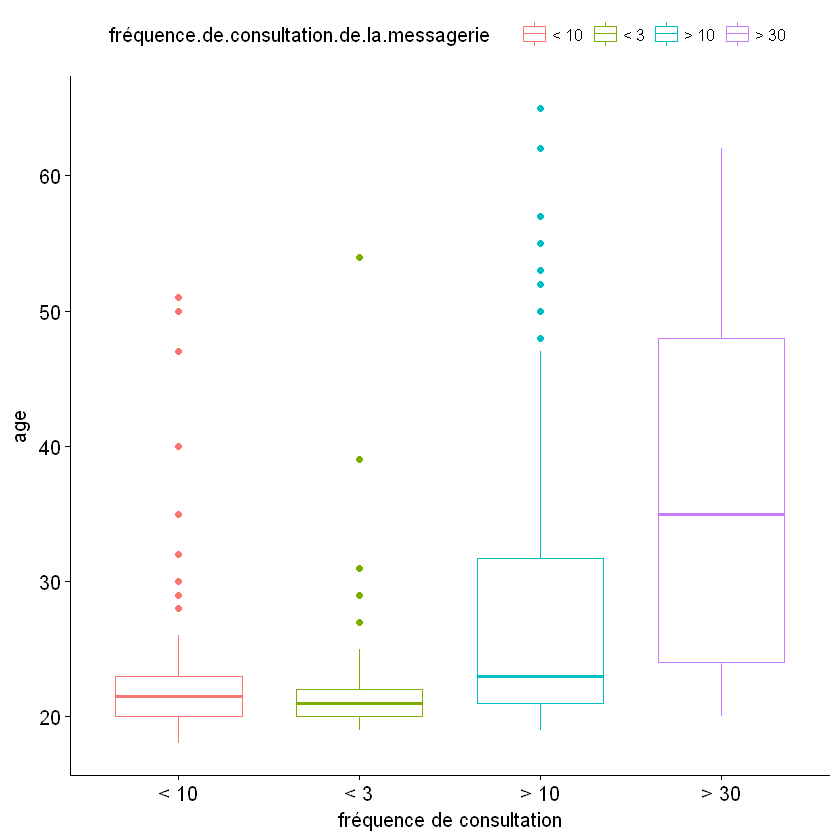

In [53]:
# boxplot(age~fréquence.de.consultation.de.la.messagerie)
ggboxplot(data, x = "fréquence.de.consultation.de.la.messagerie", y = "age", color = "fréquence.de.consultation.de.la.messagerie", ylab = "age"
          , xlab = "fréquence de consultation")

comparaison des variances des ages selon la fréquence de consultation

In [6]:
summary(aov(age~fréquence.de.consultation.de.la.messagerie))

                                            Df Sum Sq Mean Sq F value Pr(>F)
fréquence.de.consultation.de.la.messagerie   3   9156  3052.0   44.54 <2e-16
Residuals                                  396  27135    68.5               
                                              
fréquence.de.consultation.de.la.messagerie ***
Residuals                                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

la p value est significative ==> les variances peuvent être considérés égales.
Vérifions la distribution:

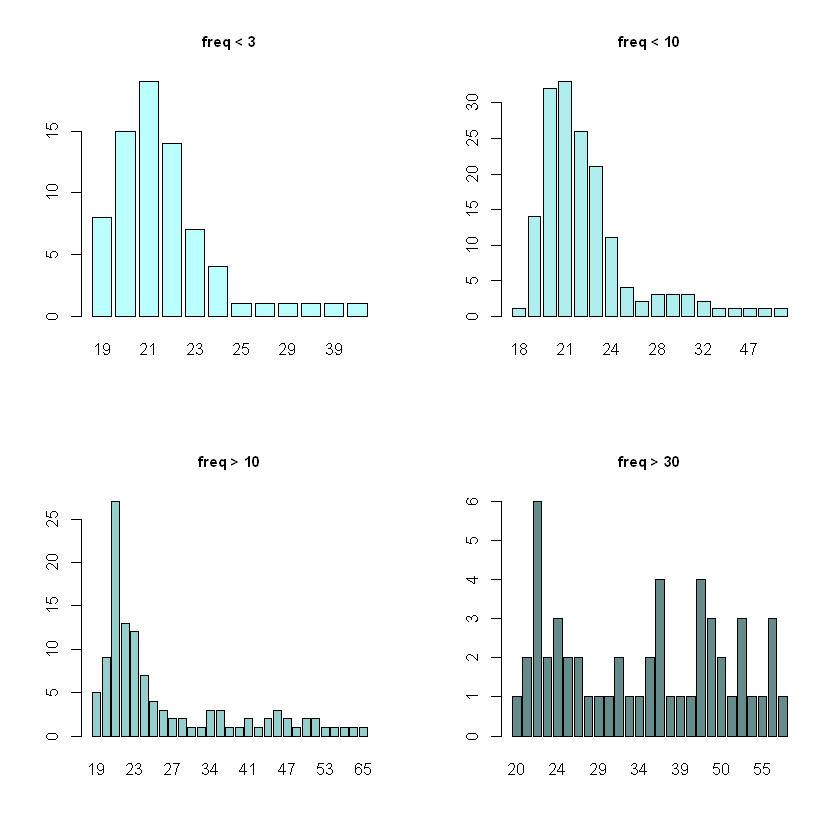

In [47]:
par(mfrow=c(2,2))
barplot(table(age[fréquence.de.consultation.de.la.messagerie=="< 3"]),main="freq < 3",font.main=2,cex.main=0.9,col="paleturquoise1")
barplot(table(age[fréquence.de.consultation.de.la.messagerie=="< 10"]),main="freq < 10",font.main=2,cex.main=0.9,col="paleturquoise2")
barplot(table(age[fréquence.de.consultation.de.la.messagerie=="> 10"]),main="freq > 10",font.main=2,cex.main=0.9,col="paleturquoise3")
barplot(table(age[fréquence.de.consultation.de.la.messagerie=="> 30"]),main="freq > 30",font.main=2,cex.main=0.9,col="paleturquoise4")





La normalité n'est vraiment pas respectée ! Il est donc nécessaire d'utiliser un test non
paramétrique :

In [9]:
kruskal.test(age~fréquence.de.consultation.de.la.messagerie)


	Kruskal-Wallis rank sum test

data:  age by fréquence.de.consultation.de.la.messagerie
Kruskal-Wallis chi-squared = 86.824, df = 3, p-value < 2.2e-16


p value significative ==> lien existant

#################notification  & temps passés sur internet

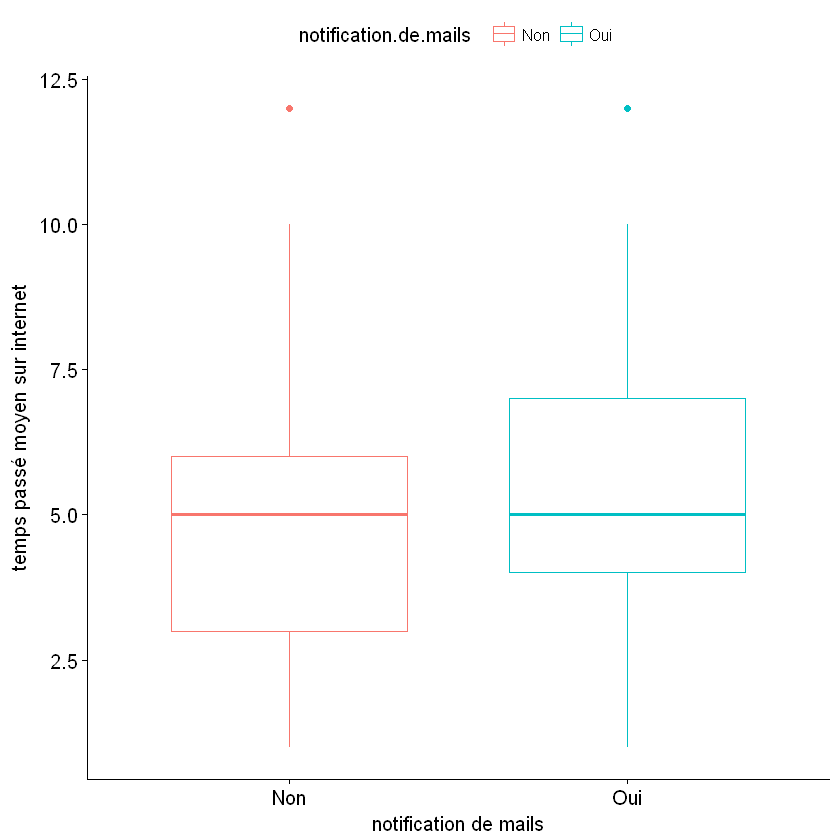

In [43]:
# boxplot(temps.passé.moyen.sur.internet~notification.de.mails)
ggboxplot(data, x = "notification.de.mails", y = "temps.passé.moyen.sur.internet", color = "notification.de.mails", ylab = "temps passé moyen sur internet"
          , xlab = "notification de mails")

In [11]:
summary(aov(temps.passé.moyen.sur.internet~notification.de.mails))

                       Df Sum Sq Mean Sq F value  Pr(>F)    
notification.de.mails   1   66.5   66.49   12.21 0.00053 ***
Residuals             398 2168.3    5.45                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

p value très petite==> égalité des variances

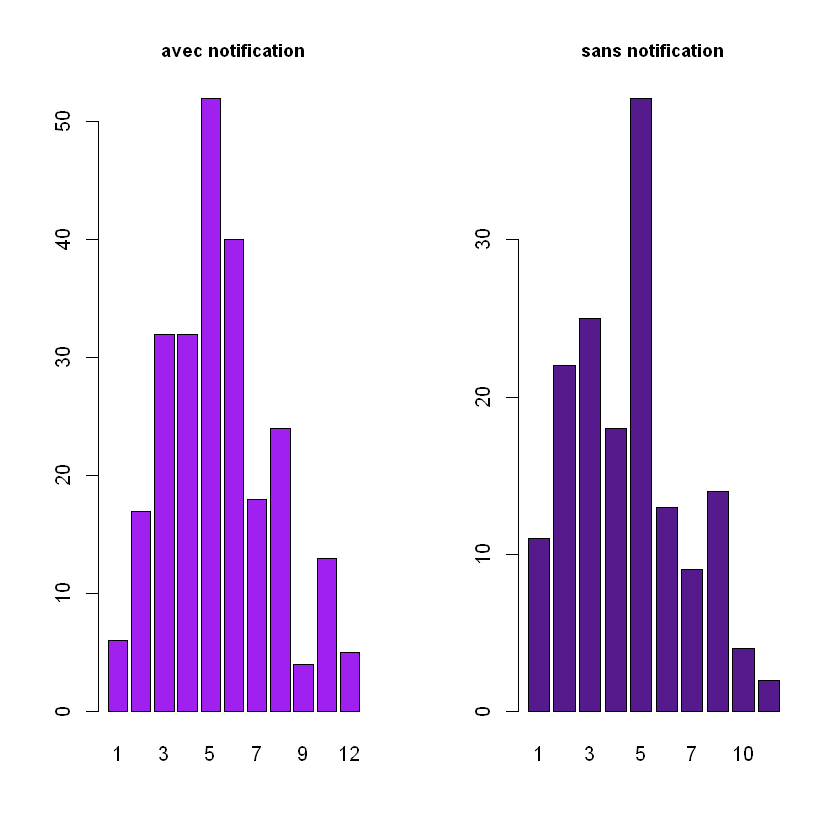

In [57]:
par(mfrow=c(1,2))
barplot(table(temps.passé.moyen.sur.internet[notification.de.mails=="Oui"]),main="avec notification",font.main=2,cex.main=0.9,col="purple")
barplot(table(temps.passé.moyen.sur.internet[notification.de.mails=="Non"]),main="sans notification",font.main=2,cex.main=0.9,col="purple4")


In [21]:
shapiro.test(table(temps.passé.moyen.sur.internet[notification.de.mails=="Oui"]))
shapiro.test(table(temps.passé.moyen.sur.internet[notification.de.mails=="Non"]))


	Shapiro-Wilk normality test

data:  table(temps.passé.moyen.sur.internet[notification.de.mails ==     "Oui"])
W = 0.93554, p-value = 0.4696



	Shapiro-Wilk normality test

data:  table(temps.passé.moyen.sur.internet[notification.de.mails ==     "Non"])
W = 0.94103, p-value = 0.5645


P value significative==> Les deux variables  suivent pas une loi normale, on peut donc utiliser le T de Student

In [22]:
t.test(temps.passé.moyen.sur.internet~notification.de.mails)


	Welch Two Sample t-test

data:  temps.passé.moyen.sur.internet by notification.de.mails
t = -3.506, df = 337.03, p-value = 0.0005165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3033928 -0.3664979
sample estimates:
mean in group Non mean in group Oui 
         4.547771          5.382716 


on peut conclure que les gens qui reçoivent des notifications passent plus de temps sur internet

############"nb mails envoyés & exp Pro

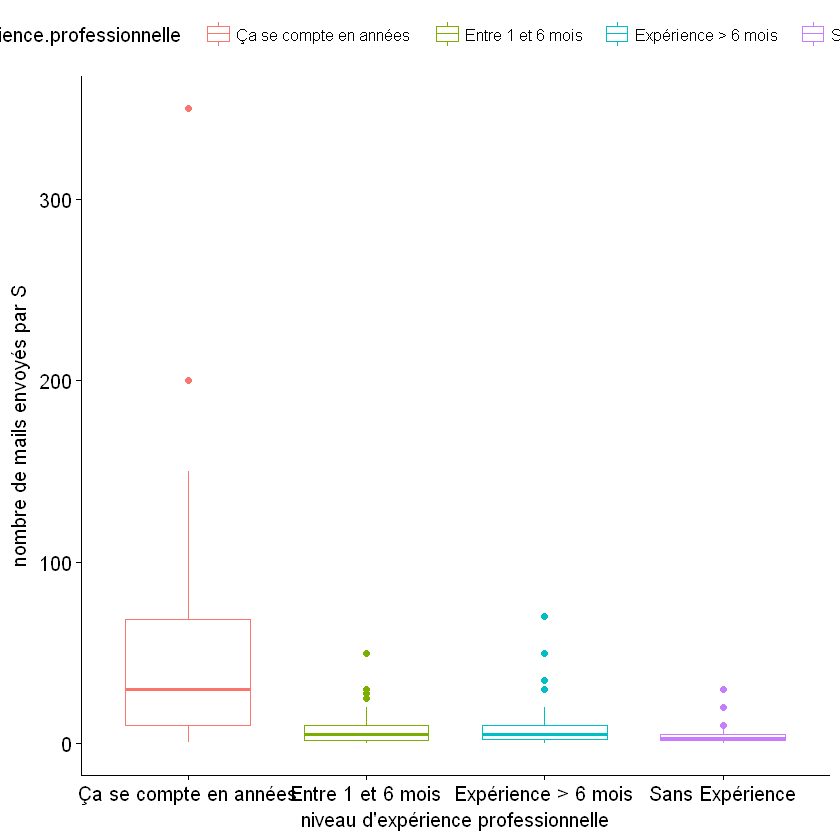

In [63]:
# boxplot(nombre.de.mails.envoyés.par.semaine~expérience.professionnelle)
ggboxplot(data, x = "expérience.professionnelle", y = "nombre.de.mails.envoyés.par.semaine", color = "expérience.professionnelle", ylab = "nombre de mails envoyés par S"
          , xlab = "niveau d'expérience professionnelle")

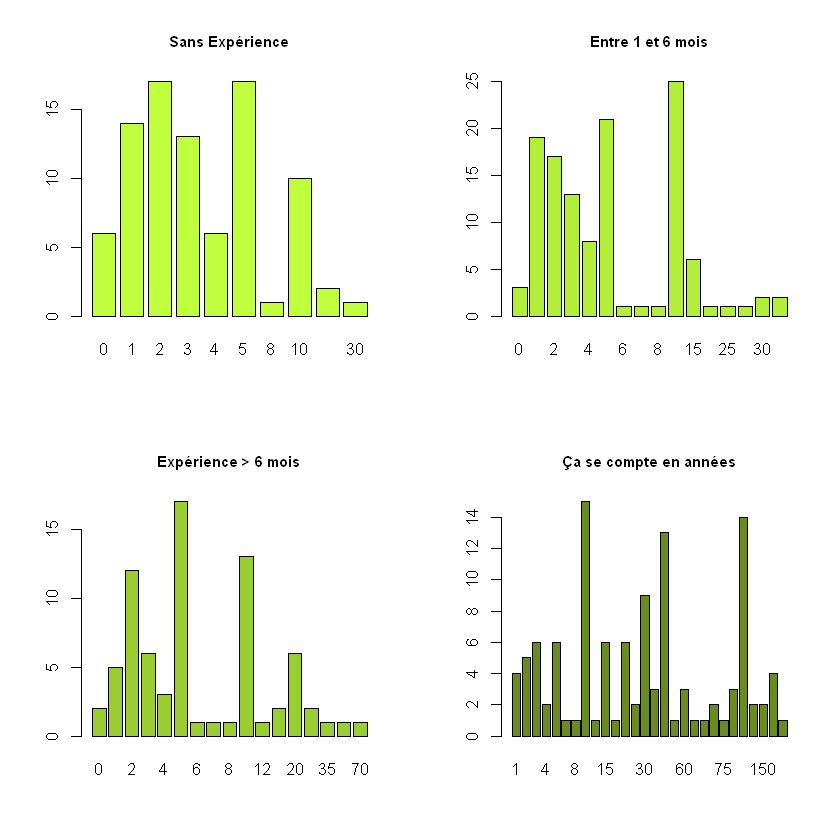

In [58]:
par(mfrow=c(2,2))
barplot(table(nombre.de.mails.envoyés.par.semaine[expérience.professionnelle=="Sans Expérience"]),main="Sans Expérience",font.main=2,cex.main=0.9,col="olivedrab1")
barplot(table(nombre.de.mails.envoyés.par.semaine[expérience.professionnelle=="Entre 1 et 6 mois"]),main="Entre 1 et 6 mois",font.main=2,cex.main=0.9,col="olivedrab2")
barplot(table(nombre.de.mails.envoyés.par.semaine[expérience.professionnelle=="Expérience > 6 mois"]),main="Expérience > 6 mois",font.main=2,cex.main=0.9,col="olivedrab3")
barplot(table(nombre.de.mails.envoyés.par.semaine[expérience.professionnelle=="Ça se compte en années"]),main="Ça se compte en années",font.main=2,cex.main=0.9,col="olivedrab4")



In [23]:
kruskal.test(nombre.de.mails.envoyés.par.semaine~expérience.professionnelle)


	Kruskal-Wallis rank sum test

data:  nombre.de.mails.envoyés.par.semaine by expérience.professionnelle
Kruskal-Wallis chi-squared = 121.37, df = 3, p-value < 2.2e-16


############### nombre de mails non lus & consultation de la boite en dehors des heures de travail

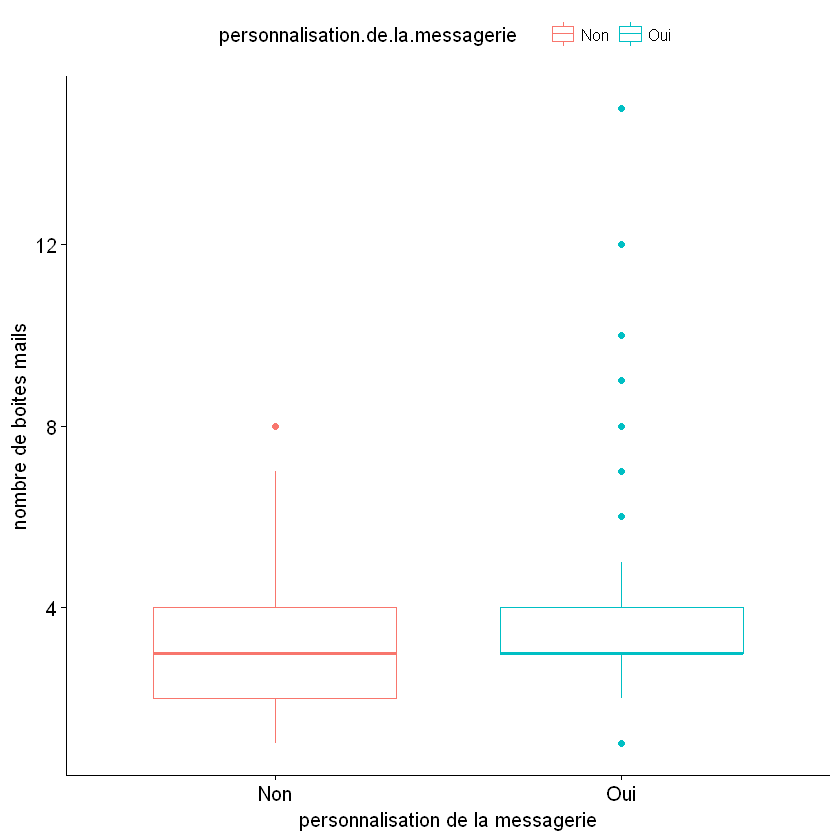

In [46]:
# boxplot(nombre.de.boites.mail~personnalisation.de.la.messagerie)
ggboxplot(data, x = "personnalisation.de.la.messagerie", y = "nombre.de.boites.mail", color = "personnalisation.de.la.messagerie", ylab = "nombre de boites mails"
          , xlab = "personnalisation de la messagerie")

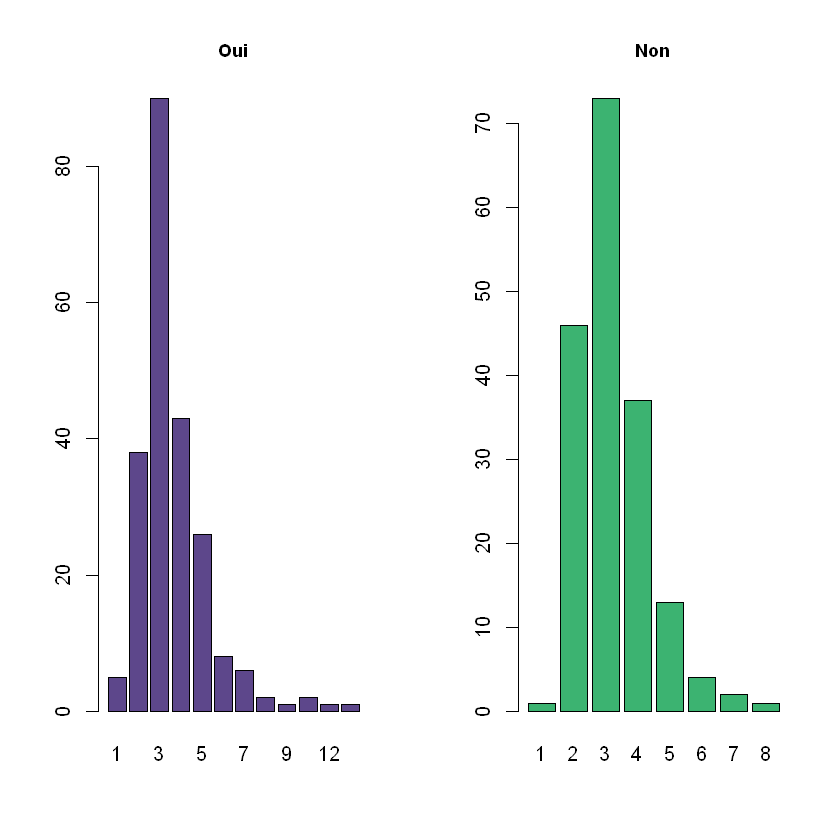

In [59]:
par(mfrow=c(1,2))
barplot(table(nombre.de.boites.mail[personnalisation.de.la.messagerie=="Oui"]),main="Oui",font.main=2,cex.main=0.9,col="mediumpurple4")
barplot(table(nombre.de.boites.mail[personnalisation.de.la.messagerie=="Non"]),main="Non",font.main=2,cex.main=0.9,col="mediumseagreen")

In [33]:
shapiro.test(table(nombre.de.boites.mail[personnalisation.de.la.messagerie=="Oui"]))
shapiro.test(table(nombre.de.boites.mail[personnalisation.de.la.messagerie=="Non"]))


	Shapiro-Wilk normality test

data:  table(nombre.de.boites.mail[personnalisation.de.la.messagerie ==     "Oui"])
W = 0.71213, p-value = 0.001105



	Shapiro-Wilk normality test

data:  table(nombre.de.boites.mail[personnalisation.de.la.messagerie ==     "Non"])
W = 0.81588, p-value = 0.04222


p value significative ==> la variable quantitative ne suit pas une loi normale==> test de wilcox

In [35]:
summary(aov(nombre.de.boites.mail~personnalisation.de.la.messagerie))

                                   Df Sum Sq Mean Sq F value  Pr(>F)   
personnalisation.de.la.messagerie   1   18.1  18.137   7.938 0.00508 **
Residuals                         398  909.4   2.285                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

P value faible ==> égalité des variances

In [34]:
wilcox.test(nombre.de.boites.mail~personnalisation.de.la.messagerie)


	Wilcoxon rank sum test with continuity correction

data:  nombre.de.boites.mail by personnalisation.de.la.messagerie
W = 17171, p-value = 0.01954
alternative hypothesis: true location shift is not equal to 0


p value faible==> lien existant